### Librairies

In [1]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Exercice 1

In [2]:
# Q1. Load the mcycle dataset and preprocess it
# Assuming mcycle dataset is a CSV file
data = pd.read_csv('mcycle.csv')
X = data['times'].values.reshape(-1, 1) / 60
y = data['accel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state)

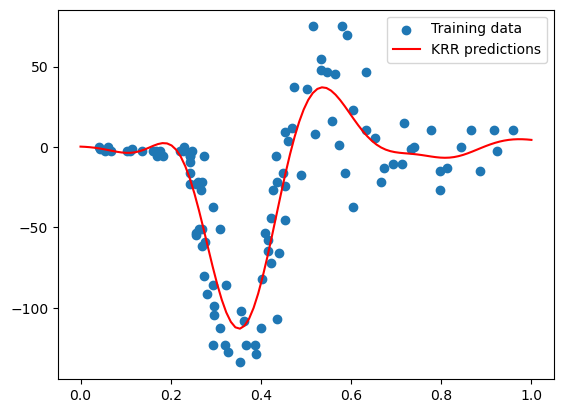

In [3]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Q2. Kernel ridge regression with RBF kernel
param_grid = {'alpha': [0.1, 1, 10], 'gamma': np.logspace(-2, 2, 5)}
krr = GridSearchCV(KernelRidge(kernel='rbf'), param_grid, cv=5)
krr.fit(X_train, y_train)
y_pred_krr = krr.predict(X_test)

# Plotting predictions
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_plot_krr = krr.predict(X_plot)
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_plot, y_plot_krr, label='KRR predictions', color='red')
plt.legend()
plt.show()

In [4]:
# RMSE for kernel ridge regression
rmse_krr = np.sqrt(mean_squared_error(y_test, y_pred_krr))
print(f"RMSE for Kernel Ridge Regression: {rmse_krr}")

RMSE for Kernel Ridge Regression: 23.04147726474608


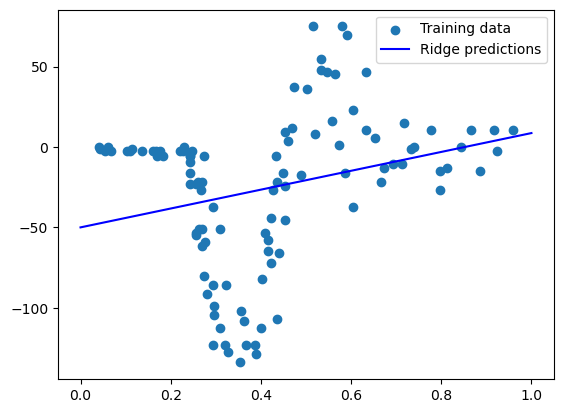

In [5]:
# Q3.1. Standard ridge regression
ridge = RidgeCV(alphas=[0.1, 1, 10], cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Plotting ridge regression predictions
y_plot_ridge = ridge.predict(X_plot)
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_plot, y_plot_ridge, label='Ridge predictions', color='blue')
plt.legend()
plt.show()

In [6]:
# RMSE for ridge regression
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE for Ridge Regression: {rmse_ridge}")

RMSE for Ridge Regression: 44.07183811071725


In [10]:
# Q3.2. Ridge regression with one sinusoidal feature
X_train_sin = (np.sqrt(2)/np.pi) * np.cos(np.pi * X_train)
X_test_sin = (np.sqrt(2)/np.pi) * np.cos(np.pi * X_test)

ridge_sin = RidgeCV(alphas=[0.1, 1, 10], cv=5)
ridge_sin.fit(X_train_sin, y_train)
y_pred_ridge_sin = ridge_sin.predict(X_test_sin)

# RMSE for ridge regression with one sinusoidal feature
rmse_ridge_sin = np.sqrt(mean_squared_error(y_test, y_pred_ridge_sin))
print(f"RMSE for Ridge with one sinusoidal feature: {rmse_ridge_sin}")

RMSE for Ridge with one sinusoidal feature: 42.92425884275561


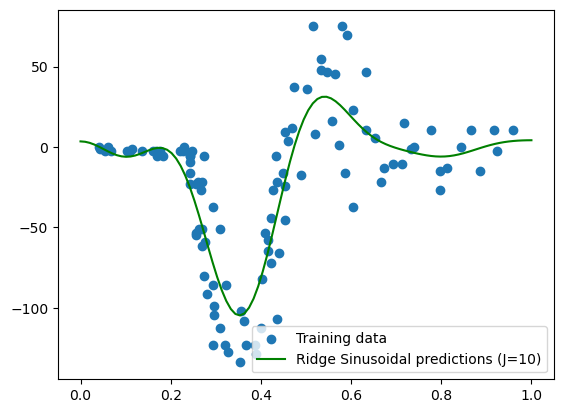

In [11]:
# Q3.3. Ridge regression with multiple sinusoidal features (J=10)
J = 10
X_train_sin_multi = np.column_stack([(np.sqrt(2)/(j*np.pi)) * np.cos(j*np.pi*X_train) for j in range(1, J+1)])
X_test_sin_multi = np.column_stack([(np.sqrt(2)/(j*np.pi)) * np.cos(j*np.pi*X_test) for j in range(1, J+1)])

ridge_sin_multi = RidgeCV(alphas=[0.1, 1, 10], cv=5)
ridge_sin_multi.fit(X_train_sin_multi, y_train)
y_pred_ridge_sin_multi = ridge_sin_multi.predict(X_test_sin_multi)

# Plotting predictions for multiple sinusoidal features
X_plot_sin_multi = np.column_stack([(np.sqrt(2)/(j*np.pi)) * np.cos(j*np.pi*X_plot) for j in range(1, J+1)])
y_plot_ridge_sin_multi = ridge_sin_multi.predict(X_plot_sin_multi)
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_plot, y_plot_ridge_sin_multi, label='Ridge Sinusoidal predictions (J=10)', color='green')
plt.legend()
plt.show()

In [12]:
# RMSE for ridge regression with multiple sinusoidal features
rmse_ridge_sin_multi = np.sqrt(mean_squared_error(y_test, y_pred_ridge_sin_multi))
print(f"RMSE for Ridge with multiple sinusoidal features (J=10): {rmse_ridge_sin_multi}")

RMSE for Ridge with multiple sinusoidal features (J=10): 23.14607960475014


In [16]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV

def ber_1(x):
    return x - 1/2

def ber_2(x):
    return x**2 - x + 1/6

def sobolev_kernel(x, y):
    return 1 + ber_2(abs(x-y)/2) + ber_2((x+y)/2)

In [17]:
Ridge_kernel = KernelRidge(kernel = sobolev_kernel)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'gamma' : np.logspace(-2, 2, 20)
}

grid_search = GridSearchCV (estimator = Ridge_kernel, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KernelRidge(kernel=<function sobolev_kernel at 0x7faf8c8593a0>),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [18]:
best_model_ridgekernel = grid_search.best_estimator_
y_pred = best_model_ridgekernel.predict(X_test)

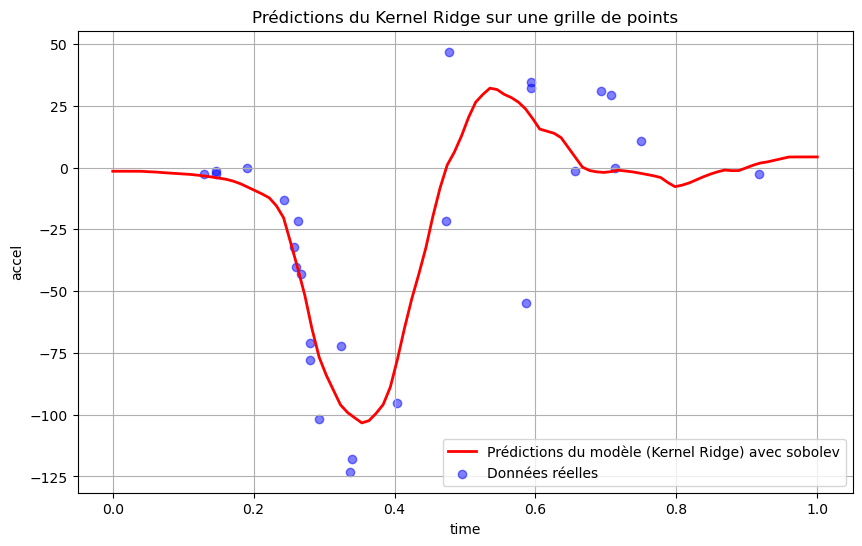

In [19]:
x_grid = np.linspace(0, 1, 100).reshape(-1, 1) 
y_grid_pred = best_model_ridgekernel.predict(x_grid)  


rmse = np.sqrt(mean_squared_error(y_test, y_pred))


plt.figure(figsize=(10, 6))
plt.plot(x_grid, y_grid_pred, color='red', label='Prédictions du modèle (Kernel Ridge) avec sobolev', linewidth=2)
plt.scatter(X_test, y_test, color='blue', label='Données réelles', alpha=0.5)
plt.title('Prédictions du Kernel Ridge sur une grille de points')
plt.xlabel('time')
plt.ylabel('accel')
plt.legend()
plt.grid()
plt.show()

In [20]:
# RMSE for Sobolev kernel ridge regression
print(f"RMSE for Sobolev Kernel Ridge Regression: {rmse}")

RMSE for Sobolev Kernel Ridge Regression: 23.044654356106776


### Q5. Bonus

Dans la question précédente, nous avons déduit la fonction de projection \( \phi(x) \) associée au noyau de Sobolev en dimension 1. Maintenant, nous allons dériver la fonction de projection pour le noyau à base radiale (RBF) en dimension 1.

#### Étape 1 : Formule du noyau RBF

Le noyau RBF en dimension 1 est donné par :

\[
k_{\text{RBF}}(x, y) = \exp\left(-\gamma (x - y)^2\right)
\]

#### Étape 2 : Expansion du carré

Nous commençons par développer le carré dans le terme exponentiel :

\[
k_{\text{RBF}}(x, y) = \exp\left(-\gamma (x^2 - 2xy + y^2)\right)
\]
\[
k_{\text{RBF}}(x, y) = \exp(-\gamma x^2) \cdot \exp(2\gamma xy) \cdot \exp(-\gamma y^2)
\]

#### Étape 3 : Développement en série de l'exponentielle

Nous nous concentrons sur le terme du milieu \( \exp(2\gamma xy) \) et utilisons le développement en série de la fonction exponentielle :

\[
\exp(2\gamma xy) = \sum_{n=0}^{\infty} \frac{(2\gamma xy)^n}{n!}
\]

Cela nous donne une somme infinie de termes qui peuvent être exprimés en fonction de cosinus, en utilisant la relation entre les puissances de \( x \) et \( y \) et les fonctions sinusoidales.

#### Étape 4 : Conclusion

La fonction de projection \( \phi(x) \) pour le noyau RBF est une série infinie de fonctions sinusoidales, similaire au noyau de Sobolev mais avec des coefficients dépendant de \( \gamma \). La fonction de projection est :

\[
\phi(x) = \left[1, \sqrt{2\gamma} \cos(\pi x), \sqrt{2\gamma} \cos(2\pi x), \dots \right]
\]

Ainsi, les noyaux de Sobolev et RBF ont tous deux des fonctions de projection impliquant des fonctions sinusoidales, avec la différence que les coefficients sont déterminés par les paramètres du noyau.


### SVM

In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import seaborn as sns

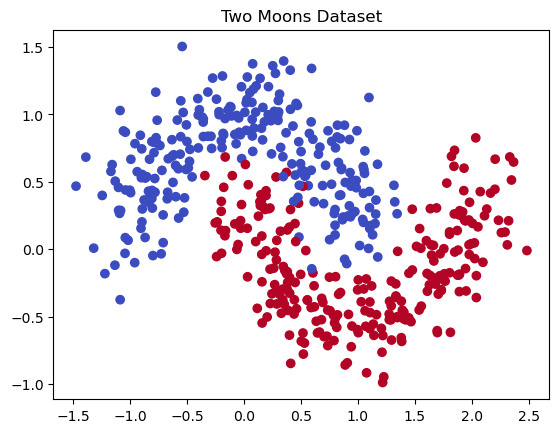

In [15]:
# Q1. Load the Two Moons dataset and visualize
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Two Moons Dataset')
plt.show()

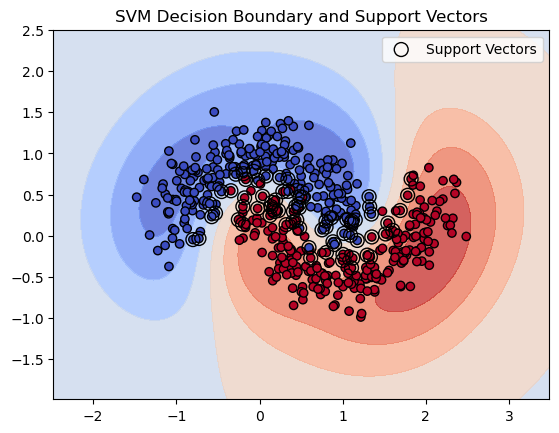

In [16]:
# Justification for SVM: Since the classes are not linearly separable, a nonlinear SVM (with a kernel like RBF) can help create a decision boundary that fits the curved separation of the two classes.

# Q2. Perform SVM with RBF kernel and visualize decision boundary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with default parameters
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

# Plot decision boundary and support vectors
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(svc, X, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=100, label='Support Vectors')
plt.title('SVM Decision Boundary and Support Vectors')
plt.legend()
plt.show()

In [ ]:
# Comment: The support vectors are located near the decision boundary, as expected. 
#These points are the most difficult to classify and thus influence the position of the decision boundary.

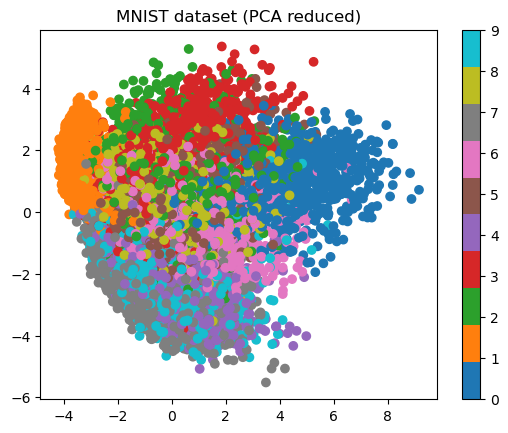

In [17]:
# Q3. Load the MNIST dataset and normalize the features
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist["data"], mnist["target"]

# Normalize the pixel values to be between 0 and 1
scaler = MinMaxScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)

# Optional: Visualize the data using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist_scaled[:10000])  # Taking a subset for visualization
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist[:10000].astype(int), cmap='tab10')
plt.title('MNIST dataset (PCA reduced)')
plt.colorbar()
plt.show()

In [18]:
# Q4. Perform SVM with RBF kernel and tune C and gamma hyperparameters
param_grid = {'C': [0.1, 1, 10], 'gamma': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
svc_mnist = SVC(kernel='rbf')
grid_search = GridSearchCV(svc_mnist, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_mnist_scaled[:10000], y_mnist[:10000].astype(int))  # Subset for faster training

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.01}


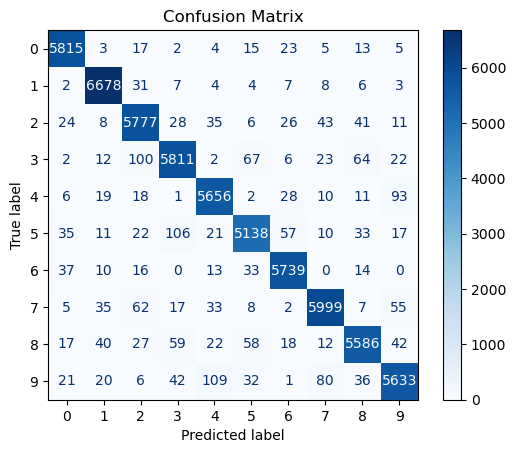

In [19]:
# Q5. Evaluate on the test set
X_test_mnist, y_test_mnist = X_mnist_scaled[10000:], y_mnist[10000:].astype(int)
y_pred_mnist = grid_search.predict(X_test_mnist)

# Compute confusion matrix and 0-1 loss
conf_matrix = confusion_matrix(y_test_mnist, y_pred_mnist)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# 0-1 loss
accuracy = accuracy_score(y_test_mnist, y_pred_mnist)
zero_one_loss = 1 - accuracy
print(f"Accuracy: {accuracy}")
print(f"0-1 Loss: {zero_one_loss}")

Accuracy: 0.9638666666666666
0-1 Loss: 0.03613333333333335
